# Exploring the Lorenz System of Differential Equations

In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

* This is one of the classic systems in non-linear differential equations
* It exhibits a range of different behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied.

In [1]:
%matplotlib inline
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

ImportError: libpng15.so.15: cannot open shared object file: No such file or directory

#Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [6]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv((x, y, z), t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorentz system."""
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

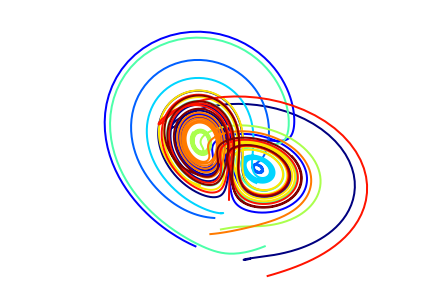

In [7]:
t, x_t = solve_lorenz(angle=0, N=10)

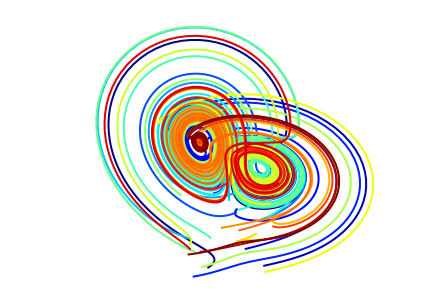

In [8]:
w = interactive(
            solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0)
            )
display(w)